## Implementing SGD on Linear Regression and comparing Manual SGD with sklearn SGD

In [2]:
import warnings 
warnings.filterwarnings('ignore')

#importing libraries and dataset
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing

ModuleNotFoundError: No module named 'prettytable'

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [11]:
print(boston.feature_names)
#boston

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [12]:
print(boston.target.shape)

(506,)


In [13]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [15]:
X = load_boston().data
Y = load_boston().target

In [19]:
X
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
df=pd.DataFrame(X)
#some intuition
df[13]=df[10]//df[12]  #here we set a column 13 such that df[13]=Boston_data['Medv']//Boston_data['B']
X=df.as_matrix()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,3.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,4.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,6.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,3.0


In [20]:
#Splitting whole data into train and test
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=4)

In [9]:
# applying column standardization on train and test data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

df_train=pd.DataFrame(X_train)
df_train['price']=y_train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,price
0,-0.425469,-0.470768,-0.954686,-0.231455,-0.919581,0.215100,-0.747410,0.454022,-0.764468,-0.976012,0.005460,0.441889,-0.444819,-0.354084,23.9
1,-0.426323,2.992576,-1.330157,-0.231455,-1.227311,-0.883652,-1.691588,3.163428,-0.651568,-0.464548,1.616046,0.287498,-0.666438,0.444297,18.2
2,-0.385190,-0.470768,-0.705828,4.320494,-0.423795,-0.125423,0.818985,-0.353904,-0.199967,-0.623278,-0.500725,0.423713,1.226505,-1.152466,21.7
3,-0.249268,-0.470768,-0.423497,-0.231455,-0.158805,-0.228336,1.021567,-0.021755,-0.651568,-0.623278,1.155878,-1.185126,1.068407,-0.354084,13.5
4,-0.365945,0.395068,-1.030363,-0.231455,0.157472,3.102729,-0.060078,-0.646202,-0.538668,-0.876071,-2.525462,0.306551,-0.752545,-0.354084,50.0


In [10]:
#SGD Implementation for Lineat Regression.
#function having parameter X_train,y_train,no of iteration,learning rate r
#intialising no of iteration=100,learning rate =0.01
#batch size=20

W,B,iteration,lr_rate,k=np.zeros(shape=(1,14)),0,750,0.01,25 #intialise W and B to zero

while iteration>=0:
    w,b,temp_vectors,temp_intercept=W,B,np.zeros(shape=(1,14)),0
    data=df_train.sample(25) #sampling random k=batch size=20 data
    x=np.array(data.drop('price',axis=1))
    y=np.array(data['price'])
    
    for i in range(k):
        temp_vectors+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
        
    W=(w-lr_rate*(temp_vectors)/k)
    B=(b-lr_rate*(temp_intercept)/k)
    
    iteration-=1
    
    
print(W)
print(B)

[[-1.24942365  0.89061473 -0.59881448  0.9203986  -1.40117399  1.55516223
   0.1680994  -2.91538048  2.19469597 -1.06691333 -2.2110781   0.92145648
  -1.96576631  2.71980831]]
[22.04635501]


In [0]:
#prediction on x_test
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
y_predic_lr=[]
for i in range(len(X_test)):
    val=np.dot(W,X_test[i])+B  #val= wTx+b
    y_predic_lr.append(np.asscalar(val))

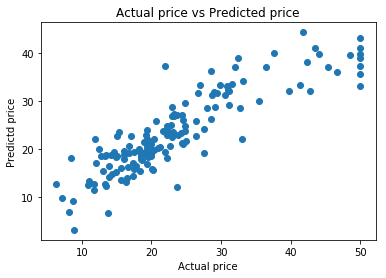

In [12]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_predic_lr)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [13]:
MSE_lr=mean_squared_error(y_test,y_predic_lr)
print('mean squared error =',MSE_lr)

mean squared error = 23.914496793480303


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


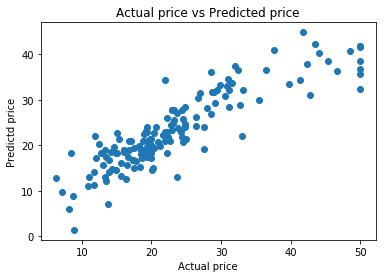

In [17]:
#SGD regression sklearn implementation

#intialising no of iteration=100,eta0=1
#taking t=2 and power_t=1 such that for each iteration eta0=eta0/pow(2,1) ,it means half each times

model=SGDRegressor(learning_rate='constant',eta0=0.01,penalty=None,n_iter=100,max_iter=100)
model.fit(X_train,y_train)
y_pred_sgd=model.predict(X_test)

#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_pred_sgd)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [18]:
MSE_sgd=mean_squared_error(y_test,y_pred_sgd)
print('mean squared error =',MSE_sgd)

mean squared error = 22.523397759886592


In [22]:
#Comparison between weights obtained from manual implementation and weights obtained from sgd implementation
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names=['Weight vector manual','Weight vector SGD sklearn']
weight_sgd=model.coef_
for i in range(13):
    x.add_row([W[0][i],weight_sgd[i]])
print(x)

+----------------------+---------------------------+
| Weight vector manual | Weight vector SGD sklearn |
+----------------------+---------------------------+
| -1.2494236549195774  |     -1.447738141819672    |
|  0.8906147344020182  |     0.8937799376554265    |
| -0.5988144837915654  |    -0.40303205842820167   |
|  0.9203985964849772  |     0.3193745240501973    |
| -1.4011739908522907  |     -1.65965023682602     |
|  1.555162233635373   |     1.672760037743413     |
| 0.16809939759744807  |     0.4341658061223362    |
|  -2.915380476287036  |    -3.2413354813564643    |
|  2.1946959666080508  |     2.871108006032379     |
| -1.0669133272714628  |     -2.095579666719773    |
| -2.2110780960021876  |     -2.654728787069825    |
|  0.9214564800651012  |     1.0533008521707796    |
|  -1.965766307474707  |    -1.7118713082232575    |
+----------------------+---------------------------+


In [21]:
#comparison between MSE of manual implementation and SGD sklearn implementation
print('MSE of manual implementation = ',MSE_lr)
print('-'*50)
print('MSE of SGD sklearn implementation = ',MSE_sgd)

MSE of manual implementation =  23.914496793480303
--------------------------------------------------
MSE of SGD sklearn implementation =  22.523397759886592


Hence here the Plots and MSE are nearly equal.

taken references from some of GIT hub sites 